In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
import os
from sklearn.ensemble import RandomForestClassifier


# Trova il percorso assoluto della cartella "esotic" (dove si trova il tuo ipynb)
current_dir = os.path.dirname(os.path.abspath("__file__"))

# Trova il percorso assoluto della cartella "lib"
lib_dir = os.path.join(current_dir, "..", "lib")

# Aggiungi il percorso di "lib" al PYTHONPATH
sys.path.append(lib_dir)

from Utility import *

features = [
    'UltimoScontroDiretto', 'EwmaGoalsSum', 'feat2'
]

featuresUnder = ['UltimoScontroDiretto', 'EwmaGoalsSum', 'feat2']

## DATA

In [2]:

data = getFullData().copy()
dataUnder = data.copy()
data.tail()

c:\Users\vitto\OneDrive\Desktop\Personale\ML - Soccer\Esotic\..\lib\Utility.py:193: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fullData['UltimoScontroDiretto'] = fullData['UltimoScontroDiretto'].replace({'H': 1, 'A': 2, 'D': 0}).infer_objects(copy=False)


,Date,Div,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,Unnamed: 59,Unnamed: 60,HFKC,AFKC,Unnamed: 106,GoalCumulativeSum,GoalCumulativeSumPrev,FormRatio,RecentFormRatio,isOver
51668,17/09/2024,SC3,19:45,Elgin,Spartans,1.0,1.0,D,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,14.0,18.0,NaN,NaN,0
51669,21/09/2024,SC3,15:00,Clyde,Elgin,0.0,0.0,D,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,0
51670,21/09/2024,SC3,15:00,East Fife,Peterhead,2.0,0.0,H,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,26.0,14.0,NaN,NaN,0
51671,21/09/2024,SC3,15:00,Forfar,Stranraer,2.0,1.0,H,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,8.0,26.0,NaN,NaN,1
51672,21/09/2024,SC3,15:00,Stirling,Bonnyrigg Rose,0.0,2.0,A,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,13.0,8.0,NaN,NaN,0


## Match Goal Distribuition

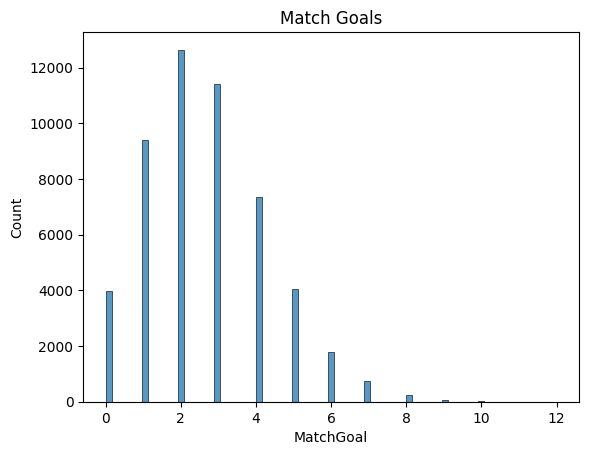

In [3]:
# Data distribution
plt.title('Match Goals')
sns.histplot(data['MatchGoal'])
plt.show()

## Feature Engineering

In [4]:
columns_to_check = [
    # 'feat1'
    # , 'feat2'
]
data['GoalCumulativeSum'] = data['HomeGoalsCumulative']	+ data['AwayGoalsCumulative']
data['GoalCumulativeSumPrev'] = data['GoalCumulativeSum'].shift(1)

# df = data[data['GoalCumulativeSum'] > 10]



In [5]:
data = data.dropna(subset=features)
# data = data.dropna()
print(len(data))
data['isOver'] = np.where(data['MatchGoal'] > 2.5, 1, 0)
x_train, x_test, y_train, y_test = train_test_split(
    data[features], data['isOver'], test_size=0.3, random_state=42, shuffle=True)

x_train = x_train.sort_index()
x_test = x_test.sort_index()
y_train = y_train.sort_index()
y_test = y_test.sort_index()


print(f'X_train: {x_train.shape} \nX_test: {x_test.shape} \ny_train: {y_train.shape} \ny_test: {y_test.shape}')

21192
X_train: (14834, 3) 
X_test: (6358, 3) 
y_train: (14834,) 
y_test: (6358,)


In [6]:
dataUnder = dataUnder.dropna(subset=featuresUnder)
# data = data.dropna()
print(len(dataUnder))
dataUnder['isOver'] = np.where(dataUnder['MatchGoal'] > 2.5, 1, 0)
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(
    dataUnder[featuresUnder], dataUnder['isOver'], test_size=0.3, random_state=42, shuffle=True)

x_train_under = x_train_under.sort_index()
x_test_under = x_test_under.sort_index()
y_train_under = y_train_under.sort_index()
y_test_under = y_test_under.sort_index()

21192


## Models

### Decision Tree model

In [7]:
from sklearn.tree import DecisionTreeClassifier



# Crea e addestra il modello di albero di decisione per la regressione
# decTreeModel = DecisionTreeClassifier(random_state=42, min_samples_split=80
#                                  # , class_weight={1: 1.2, 0: 1}
#                                  # , class_weight='balanced'
#                                  , max_depth=3  # , ccp_alpha= 0.00001
#                                  # , max_features= 3
#                                  ).fit(x_train_under, y_train_under)

decTreeModel = RandomForestClassifier(random_state=42, n_estimators=100, 
                                min_samples_split=80, max_depth=3).fit(x_train_under, y_train_under) 

# dumpModel("Under.joblib", decTreeModel)
# decTreeModel = loadModel("Under.joblib")

### LogisticRegression

In [8]:
logRegModel = trainLogRegModel(x_train, y_train)

### Random Forest

In [9]:



# Crea e addestra il modello di Random Forest
rfModel = RandomForestClassifier(random_state=42, n_estimators=100, 
                                min_samples_split=80, max_depth=3).fit(x_train, y_train) 

# rfModel = DecisionTreeClassifier(random_state=42, min_samples_split=80
#                                  # , class_weight={1: 1.2, 0: 1}
#                                  # , class_weight='balanced'
#                                  , max_depth=3  # , ccp_alpha= 0.00001
#                                  # , max_features= 3
#                                  ).fit(x_train, y_train)

# dumpModel("Over.joblib", rfModel)
# rfModel = loadModel('Over.joblib')

## Utility Func for Gain

In [10]:
quotaMin = 1.50
def calculate_gain_O25(row, prediction):
    
    if (row[prediction] == 1):
        if row['B365>2.5'] > quotaMin :
            if row['MatchGoal'] > 2.5:
                return row['B365>2.5']-1
            else:
                return -1
        else:
            return 0
    elif (row[prediction] == 0): 
        if row['B365<2.5'] > quotaMin :
            if row['MatchGoal'] < 2.5:
                return row['B365<2.5']-1
            else:
                return -1
        else:
            return 0
    else:
        return 0

def calculate_gain_Over25(row, prediction):
    if (row[prediction] == 1):
        # return 0
        if row['B365>2.5'] > quotaMin :
            if row['MatchGoal'] > 2.5:
                return row['B365>2.5']-1
            else:
                return -1
        else:
            return 0
    else:
        return 0
    
def calculate_gain_Under25(row, prediction):
    if (row[prediction] == 0): 
        # return 0
        if row['B365<2.5'] > quotaMin :
            if row['MatchGoal'] < 2.5:
                return row['B365<2.5']-1
            else:
                return -1
        else:
            return 0
    else:
        return 0

## Metrics

In [11]:
from itertools import count
from sklearn.metrics import accuracy_score
df_test = data[data.index.isin(x_test.index)].copy()
df_test_under = dataUnder[dataUnder.index.isin(x_test_under.index)].copy()
print(len(df_test))

df_test['LogRegPred'] = logRegModel.predict(x_test)
df_test_under['DecTreePred'] = decTreeModel.predict(x_test_under)
df_test['RFPred'] = rfModel.predict(x_test)



print(
    f"Test LogReg Accuracy score: {round(100*accuracy_score(y_test, df_test['LogRegPred']),2)}%")
print(
    f"Test DecTree Accuracy score: {round(100*accuracy_score(y_test_under, df_test_under['DecTreePred']),2)}%")
print(
    f"Test Random Forest Accuracy score: {round(100*accuracy_score(y_test, df_test['RFPred']),2)}%")

models = ['LogReg', 'RF']
rows = []
classAccuracyDf = pd.DataFrame(
    columns=['Modello', 'Accuratezza_Under', 'Accuratezza_Over'])
for model in models:
    row = {
        "Modello": model,
        "Accuratezza_Over": class_accuracy(y_test, df_test[model+'Pred'])['Over']
    }
    rows.append(row)
row = {"Modello": 'DecTree',"Accuratezza_Under": class_accuracy(y_test_under, df_test_under['DecTreePred'])['Under']}
rows.append(row)

classAccuracyDf = pd.DataFrame(rows)
classAccuracyDf.set_index('Modello', inplace=True)

print('')
print(classAccuracyDf)
df_test['numUnderLog'] = df_test[df_test['LogRegPred'] == 0]['LogRegPred'].count()
df_test['numOverLog'] = df_test[df_test['LogRegPred'] == 1]['LogRegPred'].count()

predictionUnder = 'DecTreePred'
predictionOver = 'RFPred'

df_test['B365<2.5'] = 1.8
df_test['B365>2.5'] = 1.8
df_test_under['B365<2.5'] = 1.8
df_test_under['B365>2.5'] = 1.8

df_test['GainOver'] = df_test.apply(calculate_gain_Over25, axis=1, args=(predictionOver,) )
df_test_under['GainUnder'] = df_test_under.apply(calculate_gain_Under25, axis=1, args=(predictionUnder,) )
# df_test['Gain'] = df_test['GainOver'].loc(-1)+ df_test_under['GainUnder'].loc(-1) 
# df_test['Equity'] = df_test['Gain'].cumsum()
df_test['EquityOver'] = df_test['GainOver'].cumsum()
df_test_under['EquityUnder'] = df_test_under['GainUnder'].cumsum()

# print(df_test['Equity'].tail(1))
print(df_test['EquityOver'].tail(1))
print(df_test_under['EquityUnder'].tail(1))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_test['isOver'], df_test[predictionOver])
print(cm)
# exportExcelWithTimeStamp(df_test_under, "../Dataframe/", "df.xlsx")



6358
Test LogReg Accuracy score: 54.31%
Test DecTree Accuracy score: 55.36%
Test Random Forest Accuracy score: 55.36%

         Accuratezza_Over  Accuratezza_Under
Modello                                     
LogReg           0.557945                NaN
RF               0.560361                NaN
DecTree               NaN           0.543839
51637    32.6
Name: EquityOver, dtype: float64
51637   -56.4
Name: EquityUnder, dtype: float64
[[1408 1657]
 [1181 2112]]
